<a href="https://colab.research.google.com/github/hamma95/fastai-course-v3/blob/master/Homework/Lesson1_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
!curl -s https://course.fast.ai/setup/colab | bash


Updating fastai...
Done.


In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"


Mounted at /content/gdrive


In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [5]:
!ls

data  gdrive  models  test  train


In [0]:
 !tar xvzf gdrive/My*/data.tar.gz

In [0]:
path=Path('/content/train')

In [0]:
path.ls()

In [0]:
np.random.seed(2)
data=ImageDataBunch.from_folder(path,valid_pct=0.2,ds_tfms=get_transforms(),bs=32,size=224)

In [9]:
data.normalize()

ImageDataBunch;

Train: LabelList (6559 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
henri-matisse,henri-matisse,henri-matisse,henri-matisse,henri-matisse
Path: /content/train;

Valid: LabelList (1639 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
pierre-auguste-renoir,vincent-van-gogh,claude-monet,pablo-picasso,nicholas-roerich
Path: /content/train;

Test: None

In [0]:
len(data.valid_ds.classes)

18

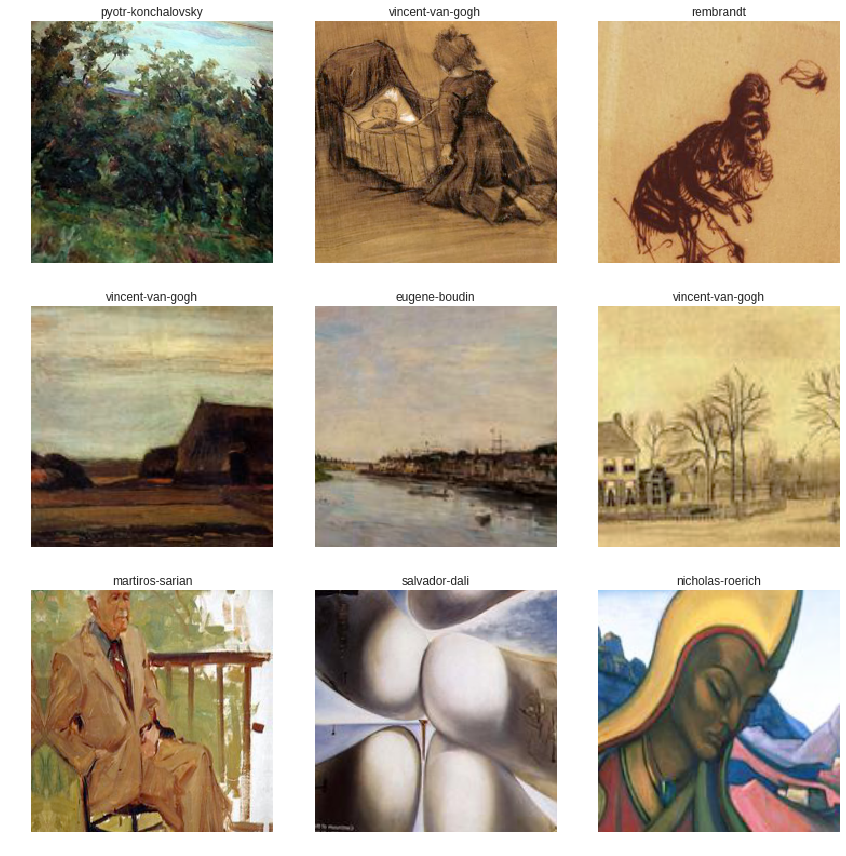

In [10]:
data.show_batch(rows=3,fig_size=(16,7))

In [0]:
learn=cnn_learner(data,models.resnet50,metrics=error_rate)

In [0]:
learn.model

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


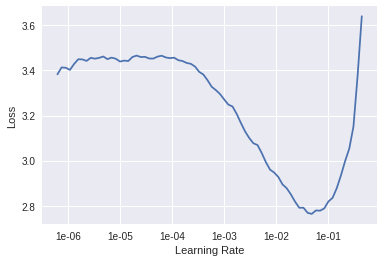

In [29]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4)

In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [33]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


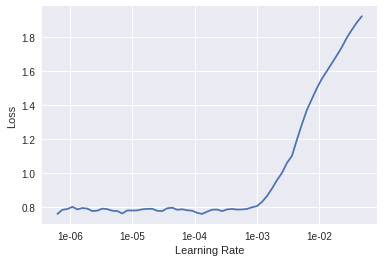

In [34]:
learn.recorder.plot()

In [35]:
learn.fit_one_cycle(4,max_lr=slice(1e-05,1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.797863,0.853301,0.267846,02:36
1,0.738031,0.674692,0.208054,02:39
2,0.441932,0.598158,0.182428,02:36
3,0.259317,0.553673,0.170836,02:39


In [0]:
learn.save('stage-2')

In [47]:
learn.data.presize(size=299)

ImageDataBunch;

Train: LabelList (6559 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
henri-matisse,henri-matisse,henri-matisse,henri-matisse,henri-matisse
Path: /content/train;

Valid: LabelList (1639 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
pierre-auguste-renoir,vincent-van-gogh,claude-monet,pablo-picasso,nicholas-roerich
Path: /content/train;

Test: None

In [0]:
learn.freeze()

In [49]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


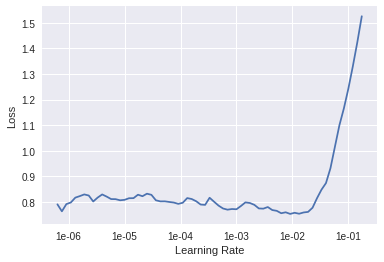

In [50]:
learn.recorder.plot()

In [51]:
learn.fit_one_cycle(4,max_lr=3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.850716,0.932518,0.269067,02:11
1,0.989468,0.874501,0.261135,02:08
2,0.811976,0.659903,0.202563,02:14
3,0.684547,0.627756,0.192190,02:07


In [0]:
learn.save('stage-3')

In [53]:
learn.fit_one_cycle(2,max_lr=1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.703889,0.663591,0.205003,02:06
1,0.598320,0.630597,0.184259,02:13


In [0]:
learn.unfreeze()

In [56]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


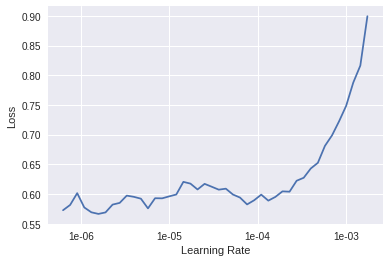

In [57]:
learn.recorder.plot()

In [58]:
learn.fit_one_cycle(3,max_lr=slice(1e-06,1e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.635506,0.618543,0.183649,02:41
1,0.575508,0.597459,0.177547,02:39
2,0.557041,0.600055,0.176937,02:41


In [0]:
learn.save('stage-3')

In [60]:
learn.fit_one_cycle(2,max_lr=slice(1e-06,1e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.512442,0.589252,0.176937,02:39
1,0.555333,0.590496,0.169616,02:40


In [62]:
learn.fit_one_cycle(2,max_lr=slice(1e-06,1e-04))

epoch,train_loss,valid_loss,error_rate,time
0,0.529030,0.574962,0.167175,02:36
1,0.481513,0.570370,0.164124,02:41


In [0]:
learn.save('stage-3')

In [0]:
interp=ClassificationInterpretation.from_learner(learn)

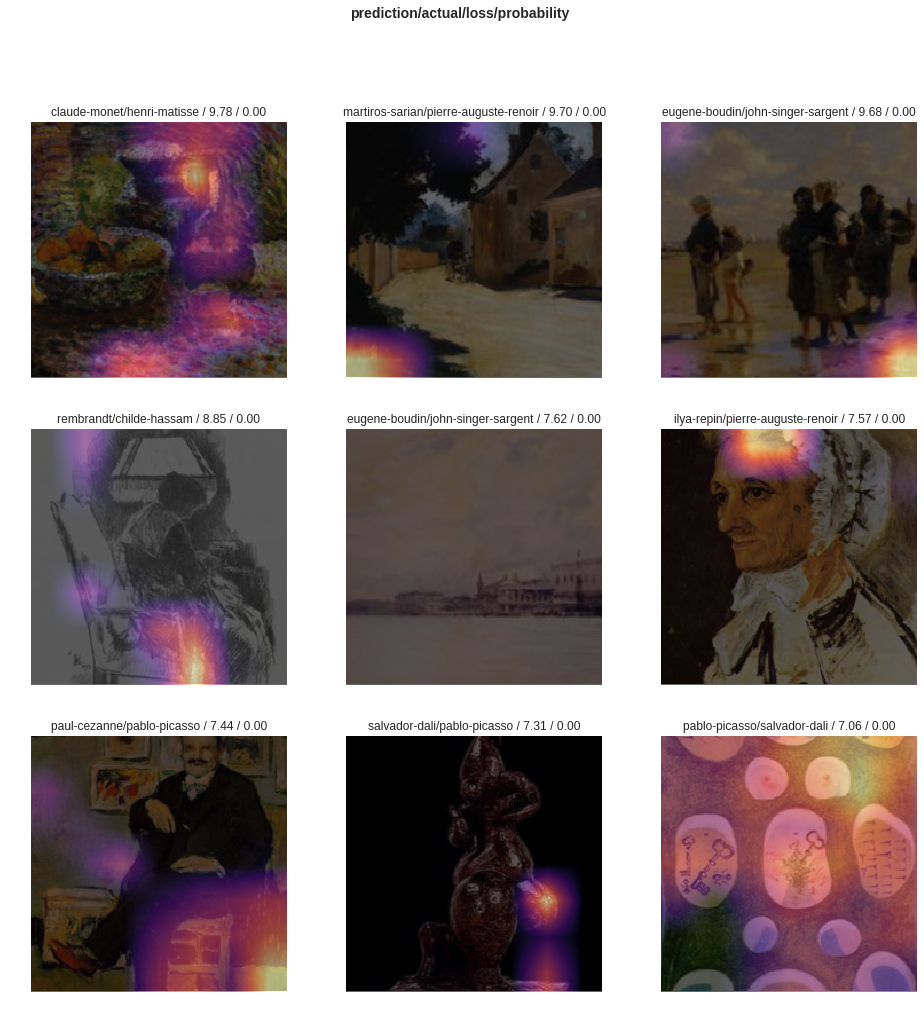

In [76]:
interp.plot_top_losses(figsize=(16,16),k=9)

In [72]:
interp.most_confused(3)

[('childe-hassam', 'camille-pissarro', 6),
 ('salvador-dali', 'pablo-picasso', 6),
 ('camille-pissarro', 'eugene-boudin', 5),
 ('camille-pissarro', 'paul-cezanne', 5),
 ('claude-monet', 'childe-hassam', 5),
 ('paul-cezanne', 'pyotr-konchalovsky', 5),
 ('claude-monet', 'vincent-van-gogh', 4),
 ('edgar-degas', 'paul-cezanne', 4),
 ('henri-matisse', 'pablo-picasso', 4),
 ('ilya-repin', 'childe-hassam', 4),
 ('ilya-repin', 'john-singer-sargent', 4),
 ('ilya-repin', 'vincent-van-gogh', 4),
 ('pablo-picasso', 'salvador-dali', 4),
 ('pierre-auguste-renoir', 'claude-monet', 4),
 ('camille-pissarro', 'claude-monet', 3),
 ('childe-hassam', 'claude-monet', 3),
 ('childe-hassam', 'eugene-boudin', 3),
 ('childe-hassam', 'vincent-van-gogh', 3),
 ('claude-monet', 'camille-pissarro', 3),
 ('edgar-degas', 'pierre-auguste-renoir', 3),
 ('edgar-degas', 'rembrandt', 3),
 ('ilya-repin', 'rembrandt', 3),
 ('martiros-sarian', 'pyotr-konchalovsky', 3),
 ('nicholas-roerich', 'salvador-dali', 3),
 ('nicholas-ro